<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv"
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [76]:
us_pop = 329968629  #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US: {res.positive/us_pop*100:2f}%")

positive    139061
negative    692290
pending      65549
total       896900
dtype: int64
Current Infection Rate 15.504627%
Percentage of US: 0.042144%


In [77]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative
37,NY,59513,112847
34,NJ,13386,22216
5,CA,5708,20549
24,MI,5486,11893
21,MA,4955,34111
16,IL,4596,23166
52,WA,4310,54896
10,FL,4246,39070
20,LA,3540,24331
41,PA,3394,30061


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA.positive.sum().reset_index().copy()
dfCAPos = gbCA.positive.sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [79]:
dfUSAPos[-7:]

,date,positive,PCT
19,20200323,42152,0.303119
20,20200324,51954,0.373606
21,20200325,63928,0.459712
22,20200326,80735,0.580573
23,20200327,99413,0.714888
24,20200328,118234,0.850231
25,20200329,139061,1.000000


In [80]:
dfCAPos[-7:]

,date,positive,PCT
19,20200323,1733,0.303609
20,20200324,2102,0.368255
21,20200325,2355,0.412579
22,20200326,3006,0.526629
23,20200327,3879,0.679573
24,20200328,4643,0.813420
25,20200329,5708,1.000000


In [81]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200325,63928,357604,51235,6136.0,900,472767,421532,225.0,1668.0,64846.0,11974.0,76820.0
20200326,80735,438603,60251,10131.0,1163,579589,519338,264.0,3996.0,80999.0,16807.0,97806.0
20200327,99413,527220,60094,13717.0,1530,686727,626633,367.0,3652.0,88617.0,18678.0,107295.0
20200328,118234,617470,65712,16729.0,1965,801416,735704,435.0,3012.0,90250.0,18821.0,109071.0
20200329,139061,692290,65549,19730.0,2428,896900,831351,463.0,3001.0,74820.0,20827.0,95647.0


In [82]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200325,2355,15921,48600,0.0,53,66876,18276,13.0,0.0,2469.0,253.0,2722.0
20200326,3006,17380,57400,0.0,65,77786,20386,12.0,0.0,1459.0,651.0,2110.0
20200327,3879,17380,57400,746.0,78,78659,21259,13.0,746.0,0.0,873.0,873.0
20200328,4643,20549,64400,1034.0,101,89592,25192,23.0,288.0,3169.0,764.0,3933.0
20200329,5708,20549,64400,1034.0,123,90657,26257,22.0,0.0,0.0,1065.0,1065.0


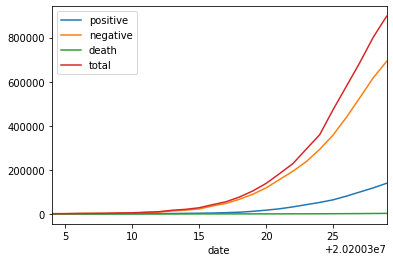

In [83]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [84]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
20200316,1678,41
20200317,3503,58
20200318,3536,58
20200319,7087,100
20200320,10442,150
20200321,15219,201
20200322,15219,201
20200323,31573,402
20200324,42164,471


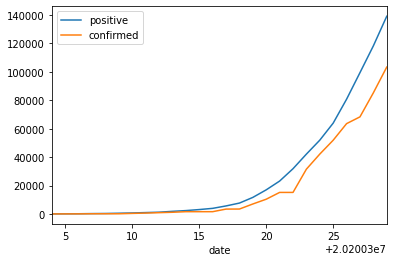

In [85]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [86]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,
20200323,1733,12567,12100,0.0,27,26400,14300,0.0,0.0,1263.0,197.0,1460.0
20200324,2102,13452,12100,0.0,40,27654,15554,13.0,0.0,885.0,369.0,1254.0
20200325,2355,15921,48600,0.0,53,66876,18276,13.0,0.0,2469.0,253.0,2722.0
20200326,3006,17380,57400,0.0,65,77786,20386,12.0,0.0,1459.0,651.0,2110.0
20200327,3879,17380,57400,746.0,78,78659,21259,13.0,746.0,0.0,873.0,873.0
20200328,4643,20549,64400,1034.0,101,89592,25192,23.0,288.0,3169.0,764.0,3933.0
20200329,5708,20549,64400,1034.0,123,90657,26257,22.0,0.0,0.0,1065.0,1065.0


In [87]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    140886
dead           2467
dtype: int64

In [88]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    5852
dead          124
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [90]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                140886
Italy              97689
China              82122
Spain              80110
Germany            62095
France             40708
Iran               38309
United Kingdom     19780
Switzerland        14829
Netherlands        10930
Name: confirmed, dtype: int64

In [91]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(20)

country
US                140886
Italy              97689
China              82122
Spain              80110
Germany            62095
France             40708
Iran               38309
United Kingdom     19780
Switzerland        14829
Netherlands        10930
Belgium            10836
Korea, South        9583
Turkey              9217
Austria             8788
Canada              6280
Portugal            5962
Norway              4284
Brazil              4256
Israel              4247
Australia           3984
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [103]:
dfState.loc['FL'].head(7)

,date,positive,current_total,pct
state,,,,
FL,20200329,4246,4246,1.000000
FL,20200328,3763,4246,0.886246
FL,20200327,2765,4246,0.651201
FL,20200326,2355,4246,0.554640
FL,20200325,1682,4246,0.396138
FL,20200324,1412,4246,0.332548
FL,20200323,1171,4246,0.275789


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

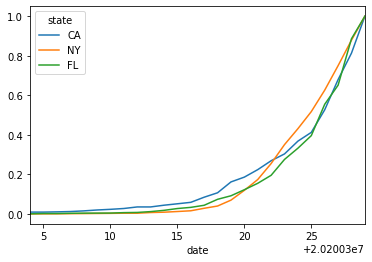

In [98]:
x = res.loc[:, ['CA','NY','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

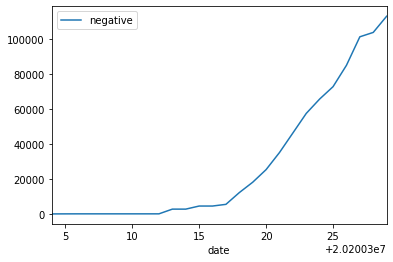

In [100]:
x = dfNYTesting.plot.line()

In [101]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['GA']))].head(10)

,state,date,positive,current_total,pct
260,GA,20200329,2651,2651,1.000000
261,GA,20200328,2366,2651,0.892493
262,GA,20200327,2001,2651,0.754810
263,GA,20200326,1525,2651,0.575255
264,GA,20200325,1247,2651,0.470389
265,GA,20200324,1026,2651,0.387024
266,GA,20200323,772,2651,0.291211
267,GA,20200322,600,2651,0.226330
268,GA,20200321,507,2651,0.191249
269,GA,20200320,420,2651,0.158431


In [106]:
datecutoff = int(((pd.to_datetime(str(dfDates.date.max())))-datetime.timedelta(days=3)).strftime("%Y%m%d"))
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .60)].sort_values(by='positive',ascending=False)


,state,date,positive,current_total,pct
800,NJ,20200326,6876,13386,0.513671
114,CA,20200326,3006,5708,0.526629
568,MI,20200326,2856,5486,0.520598
1221,WA,20200326,2580,4310,0.598608
373,IL,20200326,2538,4596,0.552219
494,MA,20200326,2417,4955,0.487790
237,FL,20200326,2355,4246,0.554640
974,PA,20200326,1687,3394,0.497054
263,GA,20200326,1525,2651,0.575255
1109,TX,20200326,1396,2552,0.547022
